# Visualización con Pandas

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

[Pandas](http://pandas.pydata.org/) puede ser usado en conjunto a los paquetes de matplotlib y seaborn para generar visualizaciones de gran calidad y con poco esfuerzo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.titlepad': 20,
         'axes.titlesize': 24,
         'axes.labelpad': 20,
         'axes.labelsize': 20,
         'lines.linewidth': 3,
         'lines.markersize': 10,
         'xtick.labelsize': 16,
         'ytick.labelsize': 16}
plt.rcParams.update(params)
sns.color_palette("bright")

# También es posible limitar el número de registros que imprimirá en pantalla Pandas
pd.set_option('display.max_rows', 100)

## Fondecyt Postdoctorado

In [2]:
fondecyt = pd.read_csv('data/tabular/fondecyt postdoc 2007-2017.csv')
fondecyt.head()

,año,n_concursados,n_aprobados,monto_solicitado,monto_aprobado
0,2007,58,37,NaN,922052
1,2008,110,74,1684744.0,1132227
2,2009,76,66,1245880.0,1084471
3,2010,140,80,6856883.0,3959662
4,2011,172,90,8686381.0,4662685


In [3]:
fondecyt=fondecyt.rename(columns = {'año':'Año', 'n_concursados':'Concursados', 'n_aprobados':'Aprobados', 
                                   'monto_solicitado':'Recursos solicitados', 'monto_aprobado':'Recursos aprobados'})
fondecyt['Tasa de aprobación']=np.round(fondecyt['Aprobados']/fondecyt['Concursados']*100,decimals=1)
fondecyt_postdoc=fondecyt.copy()
fondecyt.head()

,Año,Concursados,Aprobados,Recursos solicitados,Recursos aprobados,Tasa de aprobación
0,2007,58,37,NaN,922052,63.8
1,2008,110,74,1684744.0,1132227,67.3
2,2009,76,66,1245880.0,1084471,86.8
3,2010,140,80,6856883.0,3959662,57.1
4,2011,172,90,8686381.0,4662685,52.3


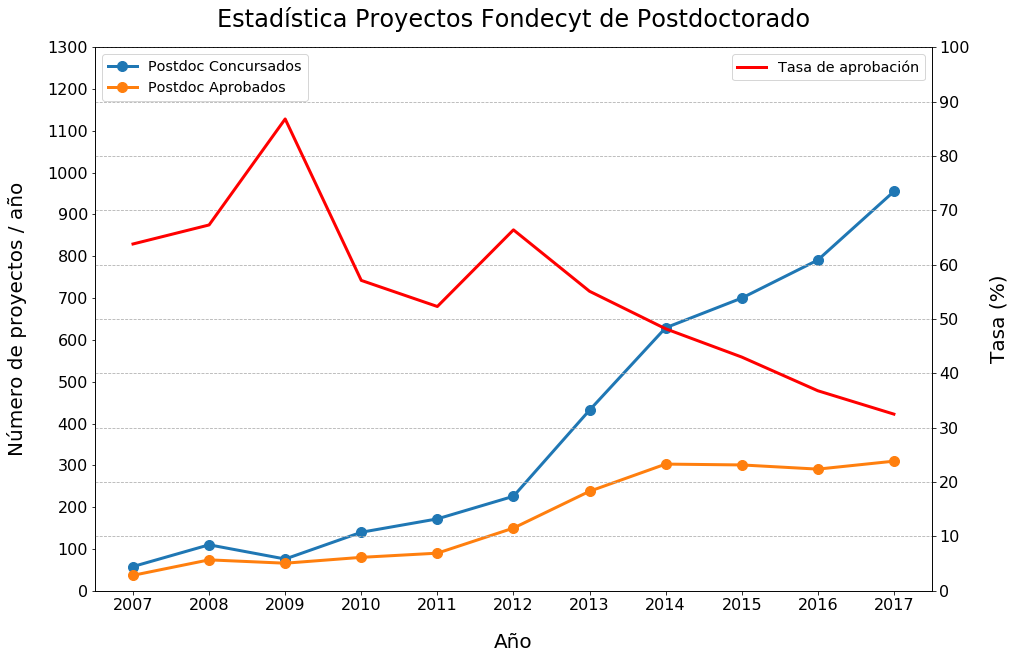

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

fondecyt.plot(kind='line', x='Año', y='Concursados', marker='o', markersize=10, ax=ax, label='Postdoc Concursados')
fondecyt.plot(kind='line', x='Año', y='Aprobados', marker='o', markersize=10, ax=ax, label='Postdoc Aprobados')
ax.set_xlim([2006.5,2017.5])
ax.set_ylim([0,1300])
ax.yaxis.set_ticks(np.arange(0, 1400, 100))
ax.legend(loc=2)

fondecyt.plot(kind='line', x='Año', y='Tasa de aprobación', color='red', grid=True, ax=ax2)
ax2.set_ylim([0,100])
ax2.yaxis.set_ticks(np.arange(0,110,10))
ax2.set_xlim([2006.5,2017.5])
ax2.xaxis.set_ticks(np.arange(2007, 2018, 1))
ax2.grid(linestyle='--')
ax2.legend(loc=1)

ax.set_title('Estadística Proyectos Fondecyt de Postdoctorado')
ax.set_ylabel('Número de proyectos / año')
ax2.set_ylabel('Tasa (%)')

fig.savefig('figures/estadistica_proyectos_fondecyt_postdoc.pdf')
fig.savefig('figures/estadistica_proyectos_fondecyt_postdoc.png')

## Fondecyt Iniciación

In [5]:
fondecyt = pd.read_csv('data/tabular/fondecyt iniciacion 2007-2017.csv')
fondecyt.head()

,año,n_concursados,n_aprobados,monto_solicitado,monto_aprobado
0,2007,357,128,NaN,NaN
1,2008,350,181,NaN,NaN
2,2009,439,134,NaN,NaN
3,2010,489,168,25623402.0,8487191.0
4,2011,525,262,28836874.0,14019657.0


In [6]:
fondecyt=fondecyt.rename(columns = {'año':'Año', 'n_concursados':'Concursados', 'n_aprobados':'Aprobados', 
                                   'monto_solicitado':'Recursos solicitados', 'monto_aprobado':'Recursos aprobados'})
fondecyt['Tasa de aprobación']=np.round(fondecyt['Aprobados']/fondecyt['Concursados']*100,decimals=1)
fondecyt_iniciacion=fondecyt.copy()
fondecyt.head()

,Año,Concursados,Aprobados,Recursos solicitados,Recursos aprobados,Tasa de aprobación
0,2007,357,128,NaN,NaN,35.9
1,2008,350,181,NaN,NaN,51.7
2,2009,439,134,NaN,NaN,30.5
3,2010,489,168,25623402.0,8487191.0,34.4
4,2011,525,262,28836874.0,14019657.0,49.9


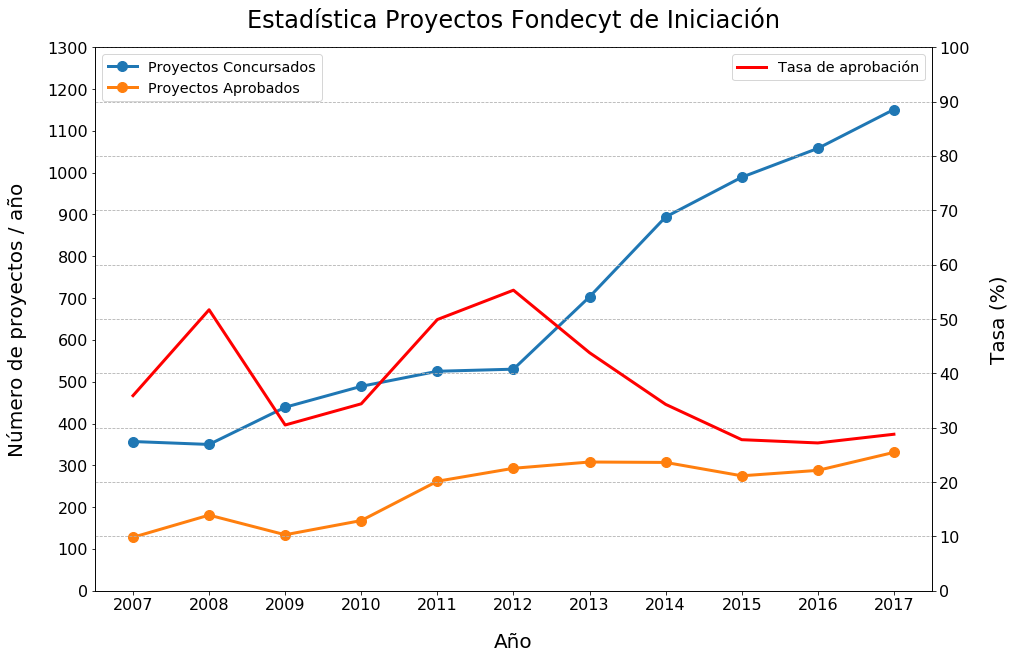

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

fondecyt.plot(kind='line', x='Año', y='Concursados', marker='o', markersize=10, ax=ax, label='Proyectos Concursados')
fondecyt.plot(kind='line', x='Año', y='Aprobados', marker='o', markersize=10, ax=ax, label='Proyectos Aprobados')
ax.set_xlim([2006.5,2017.5])
ax.set_ylim([0,1300])
ax.yaxis.set_ticks(np.arange(0, 1400, 100))
ax.legend(loc=2)

fondecyt.plot(kind='line', x='Año', y='Tasa de aprobación', color='red', grid=False, ax=ax2)
ax2.set_ylim([0,100])
ax2.yaxis.set_ticks(np.arange(0,110,10))
ax2.set_xlim([2006.5,2017.5])
ax2.xaxis.set_ticks(np.arange(2007, 2018, 1))
ax2.grid(linestyle='--')
ax2.legend(loc=1)

ax.set_title('Estadística Proyectos Fondecyt de Iniciación')
ax.set_ylabel('Número de proyectos / año')
ax2.set_ylabel('Tasa (%)')

fig.savefig('figures/estadistica_proyectos_fondecyt_iniciacion.pdf')
fig.savefig('figures/estadistica_proyectos_fondecyt_iniciacion.png')